<a href="https://colab.research.google.com/github/hxnnahc/Penang-Covid19-testAnalysis/blob/main/Penang_Covid19_testAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Introduction: Penang Covid-19 Test Analysis**

> This is a test analysis of the Covid-19 situation in Penang, Malaysia. We will be using the official Covid-19 public dataset provided by MoH. As a start, we will import *cases_state.csv* and *deaths_state.csv* and work with these two datasets. We will also import *clusters.csv* and *tests_state.csv* which will be used in a later analysis. These datasets are updated daily and can be found [here](https://github.com/MoH-Malaysia/covid19-public/tree/main/epidemic).

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv')

df1

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv')

df2

In [ ]:
df_clusters = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/clusters.csv')

df_clusters

In [ ]:
df_tests = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_state.csv')

df_tests

> For now, we will look at *df1*, which is the cases_state.csv dataset.

In [ ]:
df1.info()

In [ ]:
print('Overview of cases_state.csv dataset provided by MoH\n')
print('The number of rows:', df1.shape[0])
print('The number of columns:', df1.shape[1])
print(' -'*25)
print('Attribute for each columns:\n')
print(df1.columns)
print(' -'*25)
print('Total null values:\n')
c = df1.isnull().sum()
print(c)

Overview of cases_state.csv dataset provided by MoH

The number of rows: 9328
The number of columns: 5
 - - - - - - - - - - - - - - - - - - - - - - - - -
Attribute for each columns:

Index(['date', 'state', 'cases_new', 'cases_import', 'cases_recovered'], dtype='object')
 - - - - - - - - - - - - - - - - - - - - - - - - -
Total null values:

date                0
state               0
cases_new           0
cases_import        0
cases_recovered    32
dtype: int64


> Here is *df2*, which is the deaths_state.csv dataset.

In [ ]:
df2.info()

In [ ]:
print('Overview of deaths_state.csv dataset provided by MoH\n')
print('The number of rows:', df2.shape[0])
print('The number of columns:', df2.shape[1])
print(' -'*25)
print('Attribute for each columns:\n')
print(df2.columns)
print(' -'*25)
print('Total null values:\n')
c = df2.isnull().sum()
print(c)

Overview of deaths_state.csv dataset provided by MoH

The number of rows: 8496
The number of columns: 4
 - - - - - - - - - - - - - - - - - - - - - - - - -
Attribute for each columns:

Index(['date', 'state', 'deaths_new', 'deaths_bid'], dtype='object')
 - - - - - - - - - - - - - - - - - - - - - - - - -
Total null values:

date             0
state            0
deaths_new       0
deaths_bid    3760
dtype: int64


**Part 1: Data Cleaning**
> The current data frame contains more data than we need. Before we proceed with the analysis, we will be parsing through the data and extract only data that contains the string, 'Pulau Pinang'. 

In [ ]:
df1 = df1[df1['state'].str.contains('Pulau Pinang')]      # This refers to cases_state.csv

df1

In [ ]:
df2 = df2[df2['state'].str.contains('Pulau Pinang')]      # This refers to deaths_state.csv

df2

> Use a left join to join both *df1* and df2 and assign it to *df_cases*. We will use the new data frame for the analysis.

In [ ]:
df_cases = pd.merge(df1, df2, on='date', how='left')

df_cases

In [ ]:
df_cases = df_cases[['date', 'state_x', 'cases_new', 'cases_import', 'cases_recovered', 'deaths_new']]       # These are the columns we will use in the analysis.

df_cases

> Here, we attempt to beautify the data by renaming the column names as well as changing the attribute 'Pulau Pinang' to 'Penang'. We will retain the 'State' column to maintain the clarity of the data frame.

In [ ]:
df_cases = df_cases.rename(columns={'state_x':'State', 'cases_new':'New Cases', 'cases_import':'Imported Cases', 'cases_recovered':'Recovered', 'deaths_new':'Deaths'}, inplace=False)

df_cases

In [ ]:
def name_change(self):      # This function replaces 'Pulau Pinang' with 'Penang', which serves purely for aesthetic purposes.
  name = self.replace('Pulau Pinang', 'Penang')
  return name

In [ ]:
df_cases['State'] = df_cases['State'].apply(name_change)

df_cases

> Set the 'date' column as index and convert it to DateTimeIndex. 

In [ ]:
df_cases.set_index('date', inplace=True)

df_cases.info()

In [ ]:
df_cases.index = pd.to_datetime(df_cases.index)
df_cases.index

> Finally, check and replace any null values with 0.

In [ ]:
df_cases['Recovered'] = df_cases['Recovered'].fillna(0)   

df_cases['Deaths'] = df_cases['Deaths'].fillna(0)   

In [ ]:
df_cases.isnull().sum()

**Part 2: Data Analysis**
> We will be using the *df_cases* data frame to perform various analyses, starting with a simple line chart using the *bokeh* tool. 

In [ ]:
df_cases

In [ ]:
df_cases.describe()

> Using the *bokeh* tool, we will plot a simple line chart to visualize the movement of *new cases vs. recoveries vs. deaths per day*.

In [ ]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import Legend
output_notebook()

In [ ]:
p = figure(title='New Cases vs. Recoveries vs. Deaths Per Day', x_axis_label='Date', x_axis_type='datetime', y_axis_label='Number of Cases', height=500, width=800)
p.add_layout(Legend(), 'right')
x = df_cases.index
y1 = df_cases['New Cases']
y2 = df_cases['Recovered']
y3 = df_cases['Deaths']
p.line(x, y1, legend_label='New Cases', line_color='blue', line_width=2)
p.line(x, y2, legend_label='Recovered', line_color='orange', line_width=2)
p.line(x, y3, legend_label='Deaths', line_color='red', line_width=2)
show(p)

> Draw a simple correlation analysis.

In [ ]:
corr= df_cases.corr()

corr

,New Cases,Imported Cases,Recovered,Deaths
New Cases,1.000000,0.036750,0.791767,0.849628
Imported Cases,0.036750,1.000000,0.021952,0.026227
Recovered,0.791767,0.021952,1.000000,0.609683
Deaths,0.849628,0.026227,0.609683,1.000000


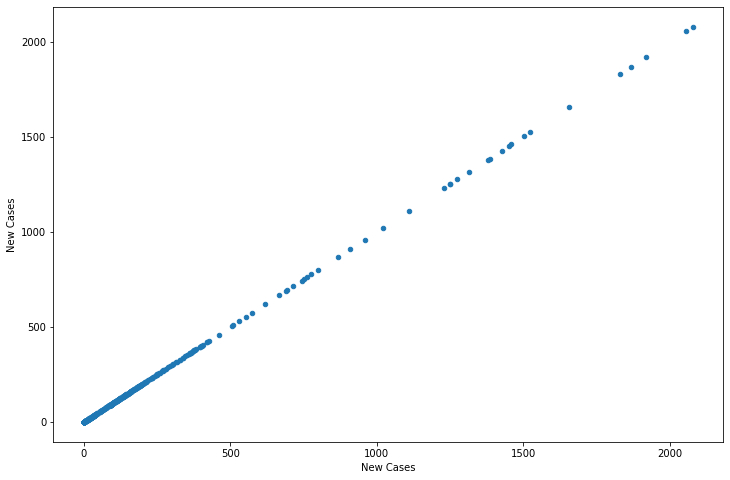

In [ ]:
df_cases.plot(kind='scatter', x='New Cases', y='New Cases', figsize=(12,8))